In [27]:
source("/minimum_wage/src/model/utils.R")

library(parsnip)
suppressPackageStartupMessages(library(recipes))
library(workflows)
library(doParallel)
library(dials)
library(ggplot2)

setwd("/minimum_wage/")

In [2]:
split <- train_test_split()
split

<Training/Testing/Total>
<122506/30628/153134>

In [3]:
spec <- multinom_reg(
    penalty = tune(), # regularization
    mixture = tune() # alpha: ratio of L1 and L2 regularization
) |>
    parsnip::set_mode("classification") |>
    parsnip::set_engine("glmnet")
spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = tune()
  mixture = tune()

Computational engine: glmnet 


In [4]:
recipe <- recipe(
    group ~ countycat + sex + martial + educat + agecat,
    data = split
) |>
    step_num2factor(
        group,
        levels = c("test", "control1", "control2")
    )
recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 5



── Operations 

• Factor variables from: group



## normal grid search

In [19]:
wf <- workflow(recipe, spec)
grid_res <- tune(training(split), wf, 3)
show_best(grid_res)

[1] "tuning with grid"


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2.825418e-02,0.2637295,pr_auc,macro,0.5423888,5,0.0009671534,Preprocessor1_Model1
4.053893e-09,0.4598352,pr_auc,macro,0.5419876,5,0.0008655590,Preprocessor1_Model2
2.093383e-06,0.7674104,pr_auc,macro,0.5419483,5,0.0008562121,Preprocessor1_Model3


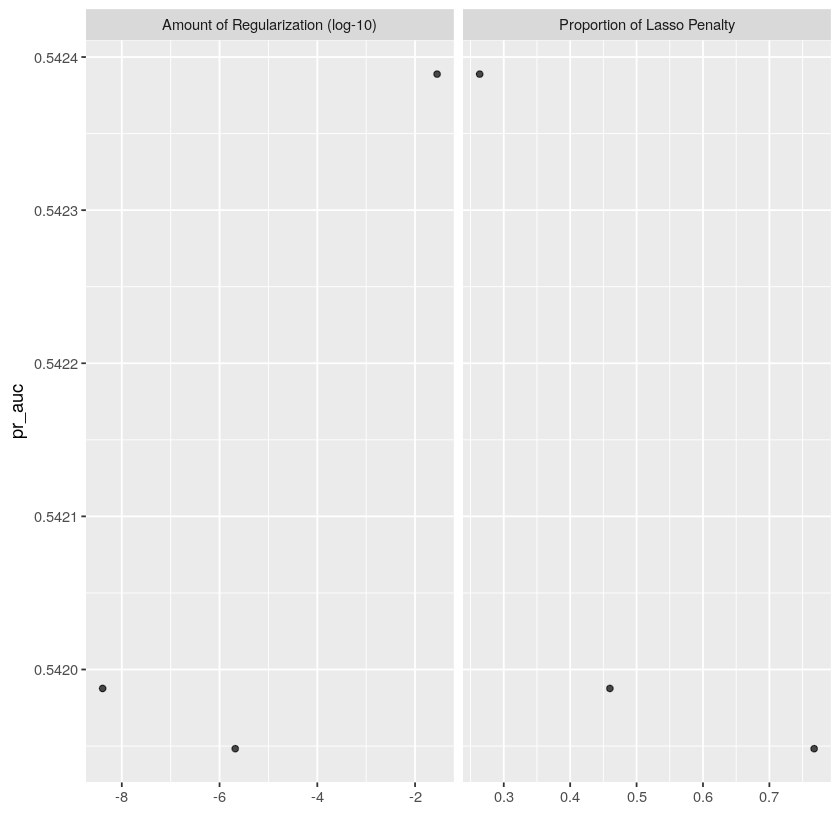

In [20]:
tune_plot <- autoplot(grid_res)
tune_plot

In [21]:
ggsave(tune_plot, filename = "data/tune/en/test.png")

Saving 6.67 x 6.67 in image


In [24]:
elastic_net <- finalize_workflow(wf, select_best(grid_res, metric = "pr_auc"))
elastic_net

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_num2factor()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 0.0282541824995641
  mixture = 0.263729466823861

Computational engine: glmnet 


In [ ]:
last_fit(elastic_net, split = split) 

In [28]:
test(elastic_net, "elastic_net", split)

id,.pred_test,.pred_control1,.pred_control2,.row,.pred_class,group,.config,model
<chr>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>
train/test split,0.28484746,0.5287344,0.18641812,8,control1,control1,Preprocessor1_Model1,elastic_net
train/test split,0.41647793,0.5067304,0.07679170,11,control1,control1,Preprocessor1_Model1,elastic_net
train/test split,0.18945941,0.4525736,0.35796695,15,control1,control1,Preprocessor1_Model1,elastic_net
train/test split,0.27516776,0.5073627,0.21746955,16,control1,control1,Preprocessor1_Model1,elastic_net
train/test split,0.23031079,0.5650728,0.20461643,17,control1,control1,Preprocessor1_Model1,elastic_net
train/test split,0.42381455,0.5225999,0.05358557,19,control1,test,Preprocessor1_Model1,elastic_net
train/test split,0.11728537,0.4360838,0.44663082,23,control2,control1,Preprocessor1_Model1,elastic_net
train/test split,0.04231109,0.1696844,0.78800448,25,control2,control1,Preprocessor1_Model1,elastic_net
train/test split,0.19142920,0.3884218,0.42014900,26,control2,control1,Preprocessor1_Model1,elastic_net
